# 1. Preprocessing Data

In [68]:
import pandas as pd
from random import randint

In [69]:
import numpy as np

In [70]:
train_Y=[]
train_X=[]

for i in range(50):
    random_younger=randint(13,64)
    train_X.append(random_younger)
    train_Y.append(1)
    
    random_older=randint(65,100)
    train_X.append(random_older)
    train_Y.append(0)

    
for i in range(1000):
    random_younger=randint(13,64)
    train_X.append(random_younger)
    train_Y.append(0)
    
    random_older=randint(65,100)
    train_X.append(random_older)
    train_Y.append(1)
    
    
    

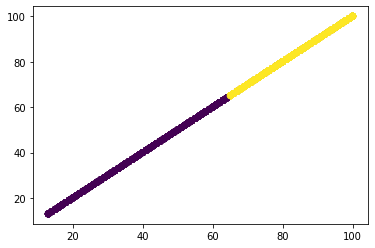

In [71]:
import matplotlib.pyplot as plt

plt.scatter(train_X,train_X, c=train_Y)

In [72]:
from sklearn.preprocessing import MinMaxScaler
train_X=np.array(train_X)
train_Y=np.array(train_Y)
scaler=MinMaxScaler(feature_range=(-1,1))
train_X_scaled=scaler.fit_transform(train_X.reshape(-1,1))
train_X_scaled

array([[ 0.14942529],
       [ 0.24137931],
       [-0.74712644],
       ...,
       [ 0.54022989],
       [ 0.10344828],
       [ 0.5862069 ]])

In [73]:
train_X_scaled.shape

(2100, 1)

In [74]:
train_Y.shape

(2100,)

# 2. Creating Keras Model

In [75]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [76]:
def create_model():
    model=Sequential()
    model.add(Dense(16,input_shape=(1,), activation='relu'))
    model.add(Dense(32,activation='relu'))

#     model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    return model
model=create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [77]:
def compile_model(model):
    optimizer=Adam(lr=0.0001)
    loss='sparse_categorical_crossentropy'
    model.compile( optimizer=optimizer,loss=loss,metrics=['accuracy'])
    return model
model=compile_model(model) 

In [78]:
def model_fit(model):
    model.fit(train_X_scaled, train_Y, validation_split=0.1, batch_size=10, epochs=10, shuffle=True, verbose=2) 
model_fit(model)

Train on 1890 samples, validate on 210 samples
Epoch 1/10
 - 0s - loss: 0.6122 - accuracy: 0.8725 - val_loss: 0.5638 - val_accuracy: 0.9095
Epoch 2/10


/home/boo/Software/miniconda3/envs/shiv/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


 - 0s - loss: 0.5497 - accuracy: 0.8772 - val_loss: 0.4886 - val_accuracy: 0.9190
Epoch 3/10
 - 0s - loss: 0.4856 - accuracy: 0.8799 - val_loss: 0.4116 - val_accuracy: 0.9381
Epoch 4/10
 - 0s - loss: 0.4252 - accuracy: 0.8937 - val_loss: 0.3417 - val_accuracy: 0.9381
Epoch 5/10
 - 0s - loss: 0.3742 - accuracy: 0.8995 - val_loss: 0.2830 - val_accuracy: 0.9476
Epoch 6/10
 - 0s - loss: 0.3348 - accuracy: 0.9058 - val_loss: 0.2370 - val_accuracy: 0.9619
Epoch 7/10
 - 0s - loss: 0.3072 - accuracy: 0.9169 - val_loss: 0.2028 - val_accuracy: 0.9619
Epoch 8/10
 - 0s - loss: 0.2890 - accuracy: 0.9307 - val_loss: 0.1779 - val_accuracy: 0.9714
Epoch 9/10
 - 0s - loss: 0.2774 - accuracy: 0.9312 - val_loss: 0.1610 - val_accuracy: 0.9714
Epoch 10/10
 - 0s - loss: 0.2698 - accuracy: 0.9349 - val_loss: 0.1480 - val_accuracy: 0.9905


# 3. Predictions 

In [79]:
test_X=[]
test_Y=[]


for i in range(10):
    random_younger=randint(13,64)
    test_X.append(random_younger)
    test_Y.append(1)
    
    random_older=randint(65,100)
    test_X.append(random_older)
    test_Y.append(0)

    
for i in range(200):
    random_younger=randint(13,64)
    test_X.append(random_younger)
    test_Y.append(0)
    
    random_older=randint(65,100)
    test_X.append(random_older)
    test_Y.append(1)
    

In [80]:
from sklearn.preprocessing import MinMaxScaler
test_X=np.array(test_X)
test_Y=np.array(test_Y)
scaler=MinMaxScaler(feature_range=(-1,1))
test_X_scaled=scaler.fit_transform(test_X.reshape(-1,1))
# test_X_scaled

In [81]:
predictions=model.predict(test_X_scaled, batch_size=10, verbose=2)
for i in predictions:
    print(i)

[0.595886   0.40411398]
[0.15048829 0.8495117 ]
[0.64057386 0.35942617]
[0.13024794 0.86975205]
[0.91140693 0.08859304]
[0.09684231 0.9031577 ]
[0.932679 0.067321]
[0.05586822 0.9441318 ]
[0.8571681  0.14283194]
[0.04629051 0.9537095 ]
[0.87413883 0.12586117]
[0.3636796 0.6363204]
[0.91909796 0.08090203]
[0.06728782 0.9327122 ]
[0.9654097  0.03459033]
[0.3636796 0.6363204]
[0.88412285 0.11587713]
[0.24537095 0.7546291 ]
[0.96365494 0.03634506]
[0.08588756 0.91411245]
[0.9491285 0.0508715]
[0.029662 0.970338]
[0.932679 0.067321]
[0.09684231 0.9031577 ]
[0.50231    0.49769002]
[0.06728782 0.9327122 ]
[0.96365494 0.03634506]
[0.04629051 0.9537095 ]
[0.93572783 0.06427219]
[0.04629051 0.9537095 ]
[0.7519241  0.24807587]
[0.10277522 0.8972248 ]
[0.45504263 0.54495734]
[0.11561155 0.88438845]
[0.88914037 0.11085963]
[0.06728782 0.9327122 ]
[0.9598844  0.04011561]
[0.04629051 0.9537095 ]
[0.96708256 0.03291743]
[0.03828816 0.9617118 ]
[0.92949647 0.07050353]
[0.16340049 0.8365995 ]
[0.850745 

[0.11561155 0.88438845]
[0.9730249  0.02697511]
[0.08588756 0.91411245]
[0.9466792  0.05332084]
[0.08084174 0.9191583 ]
[0.92617536 0.07382462]
[0.04929546 0.9507045 ]
[0.88412285 0.11587713]
[0.12253828 0.87746173]
[0.50231    0.49769002]
[0.09121712 0.9087829 ]
[0.9441188  0.05588117]
[0.07155356 0.9284464 ]
[0.9716451  0.02835488]
[0.03370978 0.96629024]
[0.79643106 0.20356895]
[0.07155356 0.9284464 ]
[0.9441188  0.05588117]
[0.03592882 0.96407115]
[0.9618147  0.03818528]
[0.22025543 0.77974457]
[0.45504263 0.54495734]
[0.05945616 0.94054383]
[0.7186573  0.28134266]
[0.28119504 0.71880496]
[0.95371115 0.04628887]
[0.07155356 0.9284464 ]
[0.93572783 0.06427219]
[0.05945616 0.94054383]
[0.86311835 0.13688165]
[0.06325907 0.93674093]
[0.9153317  0.08466831]
[0.07155356 0.9284464 ]


In [82]:
rounded_predictions=model.predict_classes(test_X_scaled, batch_size=10, verbose=2)
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1


# 4. Confusion Matrix 

In [83]:
from sklearn.metrics import confusion_matrix 
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

In [84]:
cm=confusion_matrix(test_Y, rounded_predictions)
cm

array([[194,  16],
       [ 10, 200]])

In [85]:
def plot_confusion_matrix(cm,classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks_marks=np.arange(len(classes))
    plt.xticks(ticks_marks, classes, rotation=45)
    plt.yticks(ticks_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


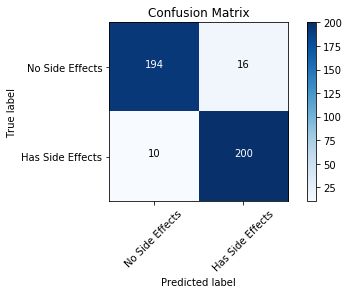

In [87]:
cm_plot_lables=["No Side Effects", "Has Side Effects"]
plot_confusion_matrix(cm, cm_plot_lables)

# 5. Saving Model

In [89]:
model.save('medical_trail_model.h5')

In [93]:
from keras.models import load_model
new_model=load_model('medical_trail_model.h5')

In [97]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [99]:
new_model.weights

[dense_10/kernel,
 dense_10/bias,
 dense_11/kernel,
 dense_11/bias,
 dense_12/kernel,
 dense_12/bias]

In [102]:
new_model.get_weights()

[array([[-0.35899362,  0.11495888,  0.42485118,  0.4237796 , -0.22505252,
         -0.08979356,  0.5630708 , -0.6242879 ,  0.62626594,  0.5742944 ,
          0.14629196,  0.02659192, -0.00922551,  0.2694806 , -0.5657906 ,
         -0.13240735]], dtype=float32),
 array([ 0.13596545,  0.03625239,  0.11283755,  0.05684565,  0.10367194,
        -0.01178728,  0.0565683 ,  0.17738216,  0.06006101, -0.0028487 ,
         0.11458059, -0.0268152 , -0.00932666,  0.02596194,  0.16945355,
        -0.04899512], dtype=float32),
 array([[ 0.28323933,  0.09366871, -0.05295098, -0.415249  , -0.0634193 ,
          0.13555792,  0.2434398 ,  0.16161402, -0.34946576, -0.48368648,
         -0.1393446 ,  0.06758057,  0.3358941 ,  0.10155418,  0.337395  ,
         -0.1846383 , -0.06774566,  0.02817593, -0.23170735, -0.44761232,
          0.39972004,  0.34281847,  0.45499775,  0.11031305,  0.27584916,
         -0.22000799,  0.17344432, -0.08849218, -0.03850965,  0.07387234,
          0.28785327, -0.3856318 ],
 

In [104]:
new_model.optimizer

# 6. Model to Json 

In [106]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "Dense", "config": {"name": "dense_10", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_11", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "a

In [107]:
model_json=model.to_json()

In [108]:
from keras.models import model_from_json

In [110]:
model_architecture=model_from_json(model_json)

In [116]:
model_architecture.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [119]:
model_architecture.get_weights()

[array([[ 0.26769915, -0.03844883,  0.44250363,  0.13449876, -0.23183069,
          0.14696613, -0.37143618,  0.5363177 , -0.16834806, -0.3897239 ,
          0.5328534 , -0.35996038,  0.438912  ,  0.16767062,  0.28741774,
          0.09703997]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 0.3269985 , -0.20708932,  0.18492322, -0.08155674,  0.24987328,
         -0.16552001,  0.13373148,  0.08970295, -0.21899207, -0.28576598,
         -0.00274589,  0.1535083 ,  0.00088403, -0.03819269,  0.11677699,
          0.29208207,  0.20476447, -0.30073667,  0.28978196, -0.1465155 ,
          0.10437343,  0.18048798, -0.29357624,  0.09294931, -0.17619586,
          0.19597445, -0.34833285, -0.1634475 ,  0.02595677,  0.2435891 ,
          0.3085727 , -0.2997084 ],
        [ 0.13784856,  0.2126035 ,  0.16688807, -0.09429742,  0.00840484,
          0.2140037 ,  0.29260585, -0.13046658,  0.21722351, -0.04486446,
          0.31

In [121]:
model_architecture.optimizer

# 7. Model weights Saving

In [122]:
model.save_weights('medical_trail_model_wieghts.h5')

In [124]:
model_architecture.load_weights('medical_trail_model_wieghts.h5')
model_architecture.get_weights()

[array([[-0.35899362,  0.11495888,  0.42485118,  0.4237796 , -0.22505252,
         -0.08979356,  0.5630708 , -0.6242879 ,  0.62626594,  0.5742944 ,
          0.14629196,  0.02659192, -0.00922551,  0.2694806 , -0.5657906 ,
         -0.13240735]], dtype=float32),
 array([ 0.13596545,  0.03625239,  0.11283755,  0.05684565,  0.10367194,
        -0.01178728,  0.0565683 ,  0.17738216,  0.06006101, -0.0028487 ,
         0.11458059, -0.0268152 , -0.00932666,  0.02596194,  0.16945355,
        -0.04899512], dtype=float32),
 array([[ 0.28323933,  0.09366871, -0.05295098, -0.415249  , -0.0634193 ,
          0.13555792,  0.2434398 ,  0.16161402, -0.34946576, -0.48368648,
         -0.1393446 ,  0.06758057,  0.3358941 ,  0.10155418,  0.337395  ,
         -0.1846383 , -0.06774566,  0.02817593, -0.23170735, -0.44761232,
          0.39972004,  0.34281847,  0.45499775,  0.11031305,  0.27584916,
         -0.22000799,  0.17344432, -0.08849218, -0.03850965,  0.07387234,
          0.28785327, -0.3856318 ],
 